# **Milestone 2**

### **Import needed libraries**

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### **Load the data**

In [85]:
path = "../../data/Faker_Data/synthetic_hr_dataset.csv"
df = pd.read_csv(path)

In [86]:
df.sample(5)

,employee_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,...,job_level,company_size,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition,age_groups,age_before_working
35249,35250,31,Male,3,Technology,8165,Fair,Medium,High,1,...,Mid,Medium,Yes,No,Yes,Fair,Medium,Left,26-35,28
58374,58375,33,Male,11,Technology,7292,Excellent,High,Average,3,...,Mid,Small,Yes,Yes,Yes,Excellent,High,Stayed,26-35,22
17992,17993,39,Male,0,Finance,4695,Excellent,Very High,Excellent,0,...,Entry,Large,No,No,Yes,Excellent,High,Stayed,36-45,39
16938,16939,49,Female,23,Healthcare,6608,Good,High,Average,1,...,Mid,Medium,No,No,No,Good,High,Stayed,46-55,26
7955,7956,43,Male,8,Healthcare,7411,Fair,High,Average,2,...,Mid,Medium,No,No,No,Fair,Medium,Stayed,36-45,35


In [87]:
df.shape

(90000, 25)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   employee_id               90000 non-null  int64 
 1   age                       90000 non-null  int64 
 2   gender                    90000 non-null  object
 3   years_at_company          90000 non-null  int64 
 4   job_role                  90000 non-null  object
 5   monthly_income            90000 non-null  int64 
 6   work_life_balance         90000 non-null  object
 7   job_satisfaction          90000 non-null  object
 8   performance_rating        90000 non-null  object
 9   number_of_promotions      90000 non-null  int64 
 10  overtime                  90000 non-null  object
 11  distance_from_home        90000 non-null  int64 
 12  education_level           90000 non-null  object
 13  marital_status            90000 non-null  object
 14  number_of_dependents  

In [89]:
df.describe()

,employee_id,age,years_at_company,monthly_income,number_of_promotions,distance_from_home,number_of_dependents,age_before_working
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,45000.500000,37.542156,9.759078,8130.085678,1.602244,19.409167,1.433367,27.783078
std,25980.906451,9.718958,8.155038,3980.003086,1.995871,14.036402,1.377640,8.144596
min,1.000000,18.000000,0.000000,2410.000000,0.000000,1.000000,0.000000,18.000000
25%,22500.750000,31.000000,3.000000,4755.000000,0.000000,9.000000,0.000000,21.000000
50%,45000.500000,37.000000,8.000000,7327.000000,1.000000,16.000000,1.000000,26.000000
75%,67500.250000,44.000000,15.000000,10329.250000,2.000000,26.000000,2.000000,33.000000
max,90000.000000,65.000000,47.000000,19837.000000,16.000000,134.000000,5.000000,65.000000


In [90]:
df.describe(include='object')

,gender,job_role,work_life_balance,job_satisfaction,performance_rating,overtime,education_level,marital_status,job_level,company_size,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition,age_groups
count,90000,90000,90000,90000,90000,90000,90000,90000,90000,90000,90000,90000,90000,90000,90000,90000,90000
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2,5
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Mid,Medium,No,No,No,Good,High,Stayed,36-45
freq,46727,26787,37918,31251,45046,63533,40096,51910,40241,40469,57489,54558,49305,45373,30094,60597,33242


In [91]:
df.isna().sum()

employee_id                 0
age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work_life_balance           0
job_satisfaction            0
performance_rating          0
number_of_promotions        0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
number_of_dependents        0
job_level                   0
company_size                0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
attrition                   0
age_groups                  0
age_before_working          0
dtype: int64

In [92]:
df.duplicated().sum()

0

## **1. Advanced Data Analysis**

### **Statistical Tests & Feature Selection**

#### *1. Chi-Squared Test*

In [93]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Define target column
target = 'attrition'

# Ensure target exists
if target not in df.columns:
    raise ValueError(f"'{target}' column not found in DataFrame.")

# Store results
results = []

for col in categorical_cols:
    if col != target:
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        significance = "✅" if p < 0.05 else "❌"
        results.append({
            'Feature': col,
            'Chi2': round(chi2, 3),
            'p-value': round(p, 5),
            'DOF': dof,
            'Significant': significance
        })

# Convert to DataFrame
chi_square_df = pd.DataFrame(results).sort_values(by='p-value')

# Display neatly
print("\n=== Chi-Square Test Results vs Attrition ===\n")
print(chi_square_df.to_string(index=False))


=== Chi-Square Test Results vs Attrition ===

                 Feature      Chi2  p-value  DOF Significant
                job_role   131.002  0.00000    4           ✅
       work_life_balance 39729.380  0.00000    3           ✅
        job_satisfaction 44067.337  0.00000    3           ✅
                overtime 18739.038  0.00000    1           ✅
               job_level   130.132  0.00000    2           ✅
            company_size    53.210  0.00000    2           ✅
leadership_opportunities   142.070  0.00000    1           ✅
      company_reputation 33319.543  0.00000    3           ✅
    employee_recognition 33364.647  0.00000    3           ✅
              age_groups    37.577  0.00000    4           ✅
         education_level    18.875  0.00083    4           ✅
          marital_status     8.803  0.01226    2           ✅
                  gender     1.758  0.18487    1           ❌
innovation_opportunities     1.258  0.26196    1           ❌
             remote_work     0.371  0.

In [94]:
# Select features based on chi-square test results
selected_features_chi_square = chi_square_df[chi_square_df['p-value'] < 0.05]['Feature'].tolist()

#### *2. T-test*

In [95]:
# Target column
target = 'attrition'

# Ensure target exists
if target not in df.columns:
    raise ValueError(f"'{target}' column not found in DataFrame.")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Ensure binary target (like Left/Stayed)
groups = df[target].unique()
if len(groups) != 2:
    raise ValueError(f"T-test requires a binary target variable, found: {groups}")

# Store results
results = []

for col in numeric_cols:
    group1 = df[df[target] == groups[0]][col].dropna()
    group2 = df[df[target] == groups[1]][col].dropna()
    
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
    significance = "✅" if p_val < 0.05 else "❌"
    
    results.append({
        'Feature': col,
        'Group1_mean': round(group1.mean(), 3),
        'Group2_mean': round(group2.mean(), 3),
        'T-Statistic': round(t_stat, 3),
        'p-value': round(p_val, 5),
        'Significant': significance
    })

# Create DataFrame
t_test_df = pd.DataFrame(results).sort_values(by='p-value')

# Display results neatly
print("\n=== T-Test Results for Numerical Columns vs Attrition ===\n")
print(t_test_df.to_string(index=False))


=== T-Test Results for Numerical Columns vs Attrition ===

             Feature  Group1_mean  Group2_mean  T-Statistic  p-value Significant
                 age       37.686       37.246        6.374  0.00000           ✅
    years_at_company        9.942        9.381        9.765  0.00000           ✅
      monthly_income     8265.343     7851.332       14.802  0.00000           ✅
number_of_promotions        1.677        1.448       16.463  0.00000           ✅
  age_before_working       27.743       27.865       -2.091  0.03652           ✅
         employee_id    45018.458    44963.490        0.298  0.76594           ❌
  distance_from_home       19.400       19.429       -0.291  0.77140           ❌
number_of_dependents        1.433        1.434       -0.029  0.97650           ❌


In [96]:
# Select features based on t-test results
selected_features_t_test = t_test_df[t_test_df['p-value'] < 0.05]['Feature'].tolist()

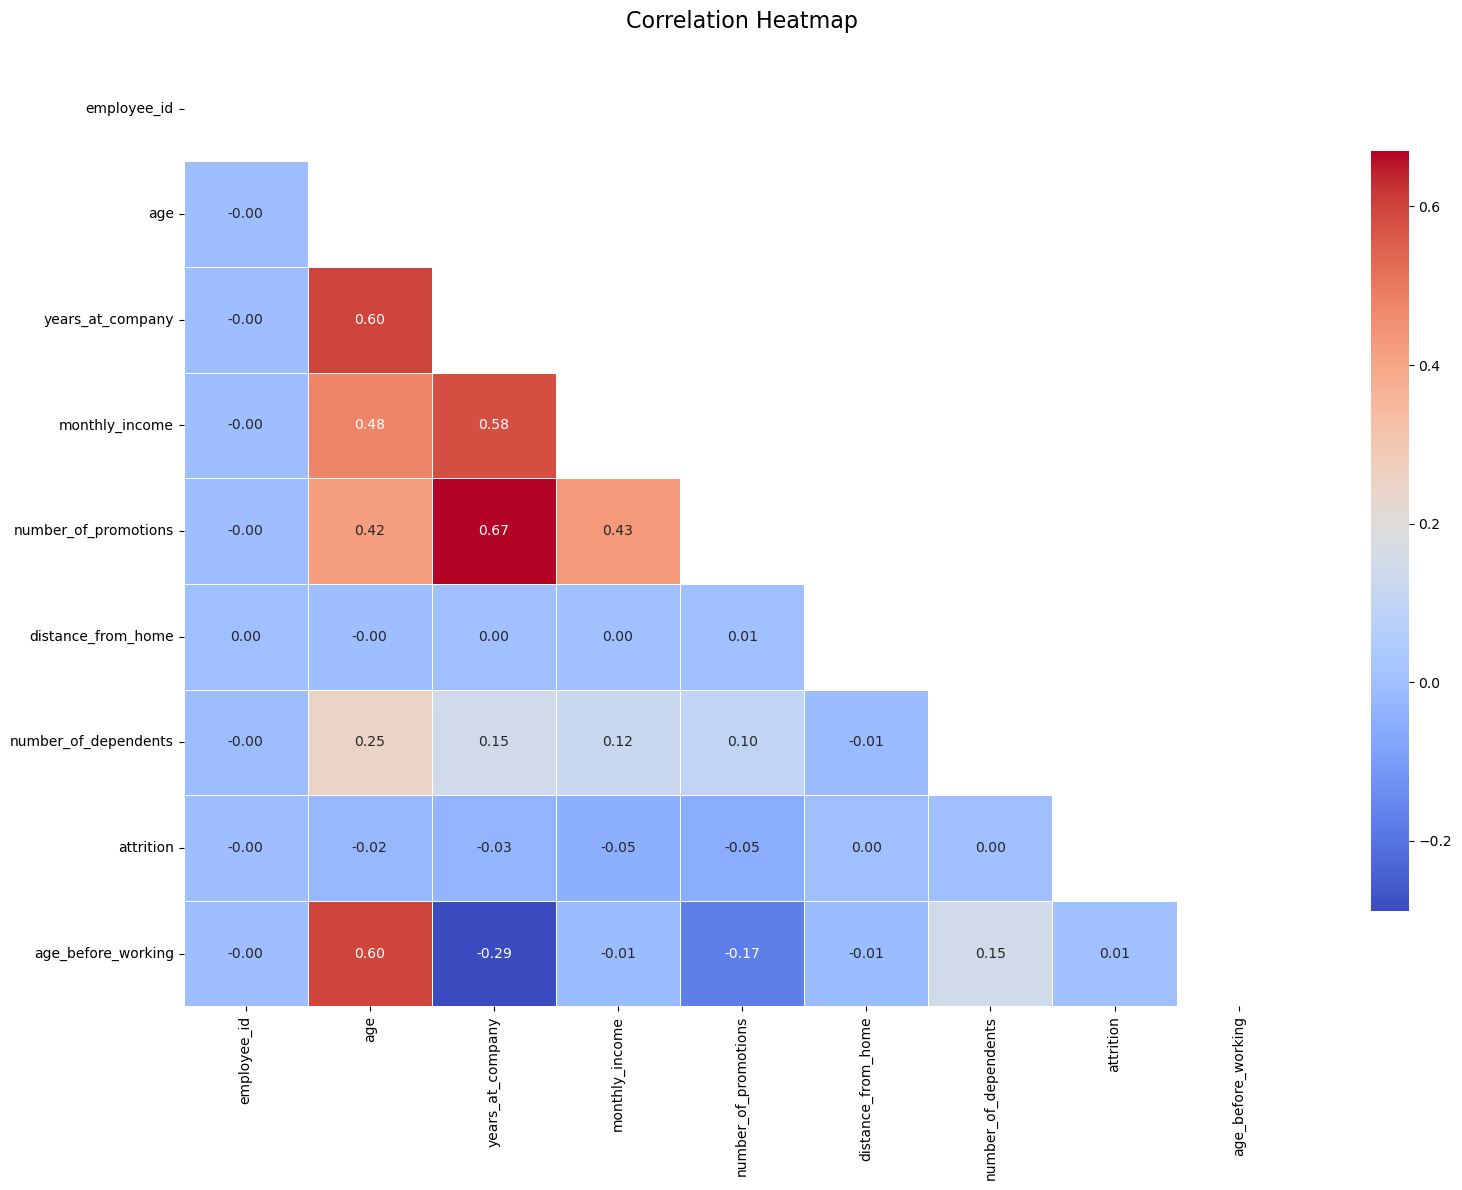

In [125]:
# Copy the dataframe to avoid modifying original
df_encoded = df.copy()

# Encode the tartget variable using label encoding
df_encoded['attrition'] = df_encoded['attrition'].map({'Stayed': 0, 'Left': 1})

# === Compute correlation matrix ===
corr_matrix = df_encoded.corr(numeric_only=True)

# === Create a mask for upper triangle (optional, for clarity) ===
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# === Plot the heatmap ===
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [98]:
selected_features = selected_features_chi_square + selected_features_t_test

In [99]:
df_selected = df[selected_features + ['attrition']]

In [100]:
df_selected.sample(5)

,job_role,work_life_balance,job_satisfaction,overtime,job_level,company_size,leadership_opportunities,company_reputation,employee_recognition,age_groups,education_level,marital_status,age,years_at_company,monthly_income,number_of_promotions,age_before_working,attrition
38764,Education,Poor,Low,Yes,Mid,Large,No,Poor,Low,36-45,Bachelor’s Degree,Married,40,21,5733,0,19,Left
24566,Technology,Good,Medium,No,Entry,Large,No,Excellent,Medium,26-35,High School,Single,31,1,5194,0,30,Stayed
83596,Education,Fair,Low,No,Entry,Medium,No,Poor,Low,26-35,High School,Single,27,0,3469,0,27,Left
31289,Healthcare,Good,High,No,Entry,Small,No,Good,High,26-35,Bachelor’s Degree,Single,27,4,3458,0,23,Stayed
49571,Healthcare,Good,High,No,Senior,Large,Yes,Good,High,46-55,Master’s Degree,Divorced,49,28,15036,8,21,Stayed


In [101]:
df_selected.shape

(90000, 18)

## **Feature Engineering**

### **Create New Features**

In [114]:
df_selected['years_at_company'].describe()

count    90000.000000
mean         9.759078
std          8.155038
min          0.000000
25%          3.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: years_at_company, dtype: float64

In [113]:
df_selected['monthly_income'].describe()

count    90000.000000
mean      8130.085678
std       3980.003086
min       2410.000000
25%       4755.000000
50%       7327.000000
75%      10329.250000
max      19837.000000
Name: monthly_income, dtype: float64

In [120]:
# Create new features from old ones (boundries are the quartile values)
# 1️⃣ Tenure Categories
def tenure_category(years):
    if years < 3:
        return 'Short-term'
    elif 3 <= years < 15:
        return 'Medium-term'
    else:
        return 'Long-term'

df_selected['tenure_category'] = df_selected['years_at_company'].apply(tenure_category)

# 2️⃣ Salary Bands
def salary_band(income):
    if income < 4755:
        return 'Low'
    elif 4755 <= income < 10329:
        return 'Medium'
    else:
        return 'High'
    
df_selected['salary_band'] = df_selected['monthly_income'].apply(salary_band)

In [121]:
df_selected.sample(10)

,job_role,work_life_balance,job_satisfaction,overtime,job_level,company_size,leadership_opportunities,company_reputation,employee_recognition,age_groups,education_level,marital_status,age,years_at_company,monthly_income,number_of_promotions,age_before_working,attrition,tenure_category,salary_band
30585,Technology,Excellent,Medium,No,Mid,Large,No,Good,High,26-35,Bachelor’s Degree,Single,28,6,9509,1,22,Stayed,Medium-term,Medium
56398,Healthcare,Good,Very High,No,Mid,Small,Yes,Excellent,Very High,26-35,Associate Degree,Married,33,3,7173,0,30,Stayed,Medium-term,Medium
66268,Finance,Good,Low,No,Entry,Medium,No,Fair,Low,36-45,Bachelor’s Degree,Married,36,6,4476,1,30,Left,Medium-term,Low
56254,Technology,Fair,Medium,Yes,Entry,Large,No,Good,Low,18-25,High School,Single,18,0,4925,0,18,Stayed,Short-term,Medium
69549,Technology,Good,High,Yes,Entry,Medium,No,Excellent,High,26-35,Associate Degree,Single,28,5,3800,1,23,Stayed,Medium-term,Low
35376,Education,Good,Very High,No,Senior,Medium,Yes,Good,Medium,55+,Master’s Degree,Divorced,57,25,9856,7,32,Stayed,Long-term,Medium
83717,Healthcare,Excellent,High,No,Senior,Large,Yes,Fair,Very High,46-55,Bachelor’s Degree,Divorced,50,18,14137,5,32,Stayed,Long-term,High
39492,Healthcare,Good,Low,No,Mid,Large,No,Good,Medium,26-35,Master’s Degree,Single,27,3,7419,1,24,Left,Medium-term,Medium
73299,Technology,Good,High,No,Entry,Medium,No,Good,High,18-25,Bachelor’s Degree,Single,22,1,4781,0,21,Stayed,Short-term,Medium
49846,Finance,Excellent,High,No,Senior,Large,Yes,Good,High,36-45,Bachelor’s Degree,Married,41,15,13969,3,26,Stayed,Long-term,High


## **Feature Transformations**

### **Encoding**

In [127]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   job_role                  90000 non-null  object
 1   work_life_balance         90000 non-null  object
 2   job_satisfaction          90000 non-null  object
 3   overtime                  90000 non-null  object
 4   job_level                 90000 non-null  object
 5   company_size              90000 non-null  object
 6   leadership_opportunities  90000 non-null  object
 7   company_reputation        90000 non-null  object
 8   employee_recognition      90000 non-null  object
 9   age_groups                90000 non-null  object
 10  education_level           90000 non-null  object
 11  marital_status            90000 non-null  object
 12  age                       90000 non-null  int64 
 13  years_at_company          90000 non-null  int64 
 14  monthly_income        

In [135]:
df_selected.select_dtypes(include='object')

,job_role,work_life_balance,job_satisfaction,overtime,job_level,company_size,leadership_opportunities,company_reputation,employee_recognition,age_groups,education_level,marital_status,attrition,tenure_category,salary_band
0,Education,Excellent,High,No,Entry,Medium,No,Good,Very High,18-25,High School,Married,Stayed,Short-term,Low
1,Technology,Excellent,Very High,Yes,Entry,Large,No,Excellent,Very High,46-55,High School,Married,Stayed,Short-term,Medium
2,Media,Poor,Low,Yes,Mid,Medium,No,Fair,Low,36-45,Master’s Degree,Married,Left,Medium-term,Medium
3,Technology,Good,Very High,No,Entry,Large,No,Excellent,High,18-25,High School,Single,Stayed,Medium-term,Medium
4,Healthcare,Poor,High,Yes,Entry,Medium,No,Good,Medium,36-45,High School,Married,Left,Medium-term,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,Technology,Fair,Medium,No,Mid,Large,No,Good,High,26-35,Bachelor’s Degree,Divorced,Stayed,Long-term,Medium
89996,Technology,Fair,Medium,No,Mid,Small,Yes,Good,Low,26-35,Bachelor’s Degree,Divorced,Stayed,Medium-term,Medium
89997,Finance,Fair,Low,No,Mid,Medium,No,Fair,Medium,36-45,Bachelor’s Degree,Married,Stayed,Medium-term,Medium
89998,Technology,Poor,Low,Yes,Senior,Small,Yes,Poor,Low,36-45,Master’s Degree,Divorced,Left,Medium-term,High


`Label Encoding`
1. work_life_balance
2. job_satisfaction
3. overtime	
4. job_level	
5. company_size
6. leadership_opportunities
7. company_reputation
8. employee_recognition
9. age_groups
10. education_level
11. attrition
12. tenure_category
13. salary_band

`One hot Encoding`
1. job_role
2. marital_status

In [143]:
label_encode_cols = [
    'work_life_balance', 'job_satisfaction', 'overtime', 'job_level',
    'company_size', 'leadership_opportunities', 'company_reputation',
    'employee_recognition', 'age_groups', 'education_level',
    'attrition', 'tenure_category', 'salary_band'
]

onehot_encode_cols = ['job_role', 'marital_status']

# --- 2️⃣ Apply Label Encoding ---
le = LabelEncoder()

# Apply label encoding to each appropriate column
for col in label_encode_cols:
    if col in df_selected.columns:
        df_selected[col] = le.fit_transform(df_selected[col].astype(str))

# --- 3️⃣ Apply One-Hot Encoding ---
df_encoded = pd.get_dummies(df_selected, columns=onehot_encode_cols, drop_first=True)
df_encoded = df_encoded.astype(int)

In [144]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   work_life_balance         90000 non-null  int32
 1   job_satisfaction          90000 non-null  int32
 2   overtime                  90000 non-null  int32
 3   job_level                 90000 non-null  int32
 4   company_size              90000 non-null  int32
 5   leadership_opportunities  90000 non-null  int32
 6   company_reputation        90000 non-null  int32
 7   employee_recognition      90000 non-null  int32
 8   age_groups                90000 non-null  int32
 9   education_level           90000 non-null  int32
 10  age                       90000 non-null  int32
 11  years_at_company          90000 non-null  int32
 12  monthly_income            90000 non-null  int32
 13  number_of_promotions      90000 non-null  int32
 14  age_before_working        90000 non-nu

In [148]:
df_encoded.sample(5)

,work_life_balance,job_satisfaction,overtime,job_level,company_size,leadership_opportunities,company_reputation,employee_recognition,age_groups,education_level,...,age_before_working,attrition,tenure_category,salary_band,job_role_Finance,job_role_Healthcare,job_role_Media,job_role_Technology,marital_status_Married,marital_status_Single
73281,1,3,0,2,1,1,1,0,1,1,...,21,1,1,0,0,0,1,0,0,1
49556,2,0,0,2,0,1,2,0,2,3,...,22,1,0,0,1,0,0,0,1,0
14338,2,3,0,0,1,0,0,2,2,0,...,40,1,1,1,0,0,0,0,1,0
53586,1,0,0,0,1,0,1,2,2,1,...,43,0,2,1,0,0,0,0,1,0
74594,2,0,0,1,1,0,2,1,1,1,...,22,1,1,2,1,0,0,0,0,1


### **Scaling**

In [ ]:
# no_scaling_cols = [
#     'work_life_balance', 'job_satisfaction', 'overtime', 'job_level', 'company_size',
#     'leadership_opportunities', 'company_reputation', 'employee_recognition',
#     'age_groups', 'education_level', 'attrition', 'tenure_category', 'salary_band',
#     'job_role_Finance', 'job_role_Healthcare', 'job_role_Media', 'job_role_Technology',
#     'marital_status_Married', 'marital_status_Single'
# ]

In [157]:
# 🧮 Define the columns for each scaling type
standard_scale_cols = ['age', 'age_before_working']
minmax_scale_cols = ['years_at_company', 'monthly_income', 'number_of_promotions']

# Copy dataframe to avoid overwriting original
df_scaled = df_encoded.copy()

# ⚙️ Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# 🧠 Apply StandardScaler
df_scaled[standard_scale_cols] = standard_scaler.fit_transform(df_scaled[standard_scale_cols])

# 💵 Apply MinMaxScaler
df_scaled[minmax_scale_cols] = minmax_scaler.fit_transform(df_scaled[minmax_scale_cols])

# ✅ Check the scaled results
df_scaled.head()

,work_life_balance,job_satisfaction,overtime,job_level,company_size,leadership_opportunities,company_reputation,employee_recognition,age_groups,education_level,...,age_before_working,attrition,tenure_category,salary_band,job_role_Finance,job_role_Healthcare,job_role_Media,job_role_Technology,marital_status_Married,marital_status_Single
0,0,0,0,0,1,0,2,3,0,2,...,-0.710055,1,2,1,0,0,0,0,1,0
1,0,3,1,0,0,0,0,3,3,2,...,2.113919,1,2,2,0,0,0,1,1,0
2,3,1,1,1,1,0,1,1,2,3,...,0.272197,0,1,2,0,0,1,0,1,0
3,2,3,0,0,0,0,0,0,0,2,...,-0.710055,1,1,2,0,0,0,1,0,1
4,3,0,1,0,1,0,2,2,2,2,...,-0.218929,0,1,1,0,1,0,0,1,0


## **3. Data Visualization**

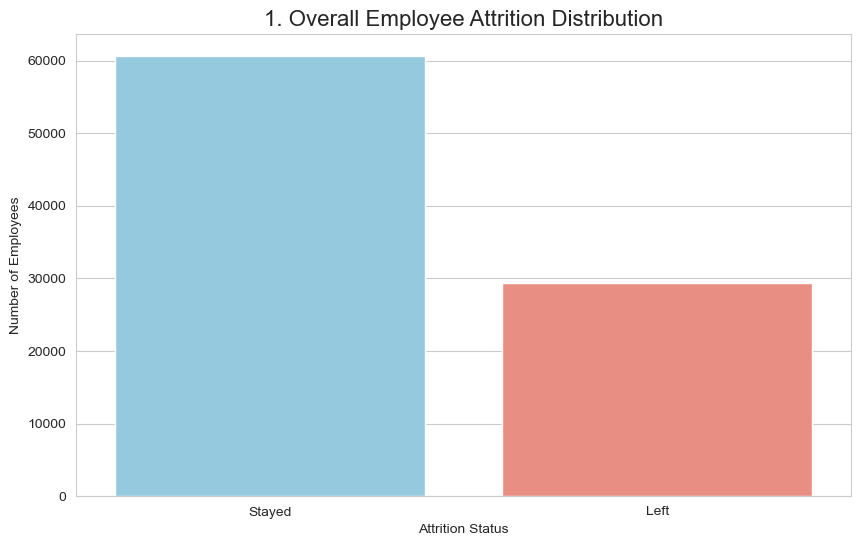

In [173]:
# --- Plotting Setup ---
sns.set_style("whitegrid")
palette_colors = {"Stayed": "skyblue", "Left": "salmon"}

# --- Visualization 1: Overall Attrition ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='attrition', palette=palette_colors)
plt.title('1. Overall Employee Attrition Distribution', fontsize=16)
plt.xlabel('Attrition Status')
plt.ylabel('Number of Employees')
plt.show()

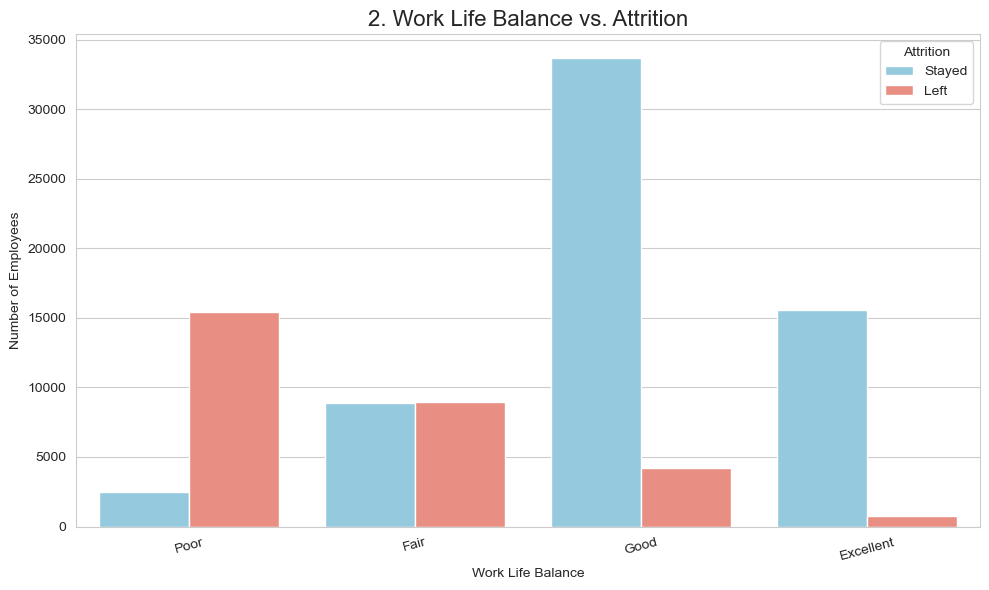

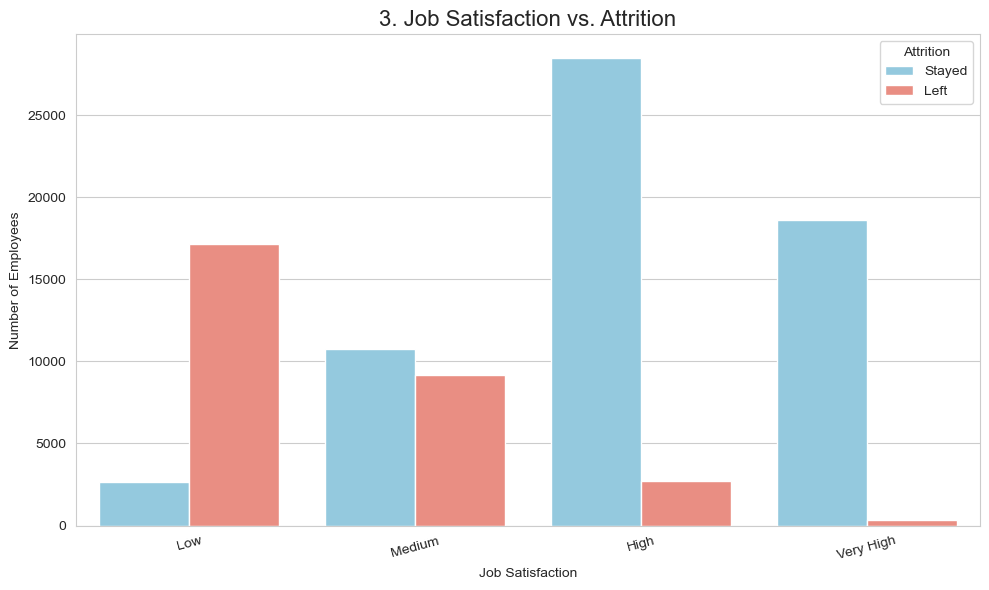

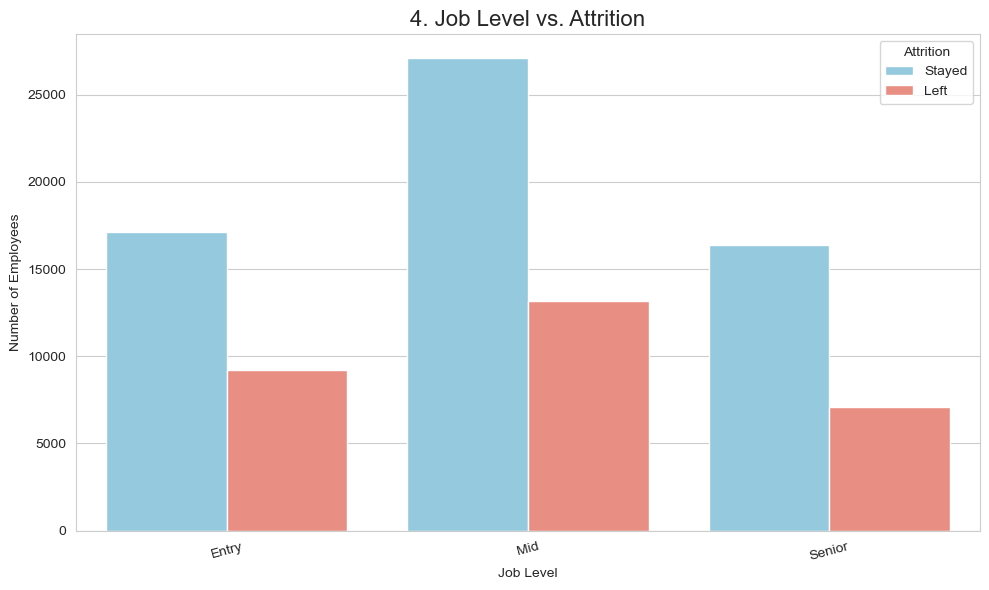

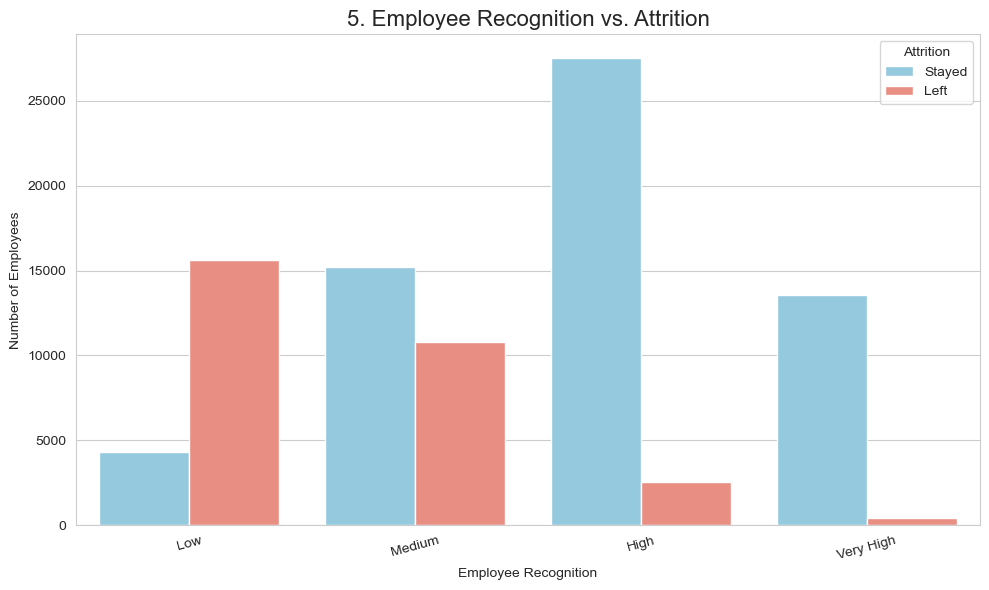

In [174]:
# --- Visualizations 2-5: Categorical Features ---
categorical_features = ['work_life_balance', 'job_satisfaction', 'job_level', 'employee_recognition']
for i, feature in enumerate(categorical_features, 2):
    plt.figure(figsize=(10, 6))
    order = None
    if feature == 'work_life_balance': order = ['Poor', 'Fair', 'Good', 'Excellent']
    elif feature == 'job_satisfaction': order = ['Low', 'Medium', 'High', 'Very High']
    elif feature == 'job_level': order = ['Entry', 'Mid', 'Senior']
    elif feature == 'employee_recognition': order = ['Low', 'Medium', 'High', 'Very High']
    
    sns.countplot(data=df, x=feature, hue='attrition', palette=palette_colors, order=order)
    plt.title(f'{i}. {feature.replace("_", " ").title()} vs. Attrition', fontsize=16)
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Number of Employees')
    plt.legend(title='Attrition')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


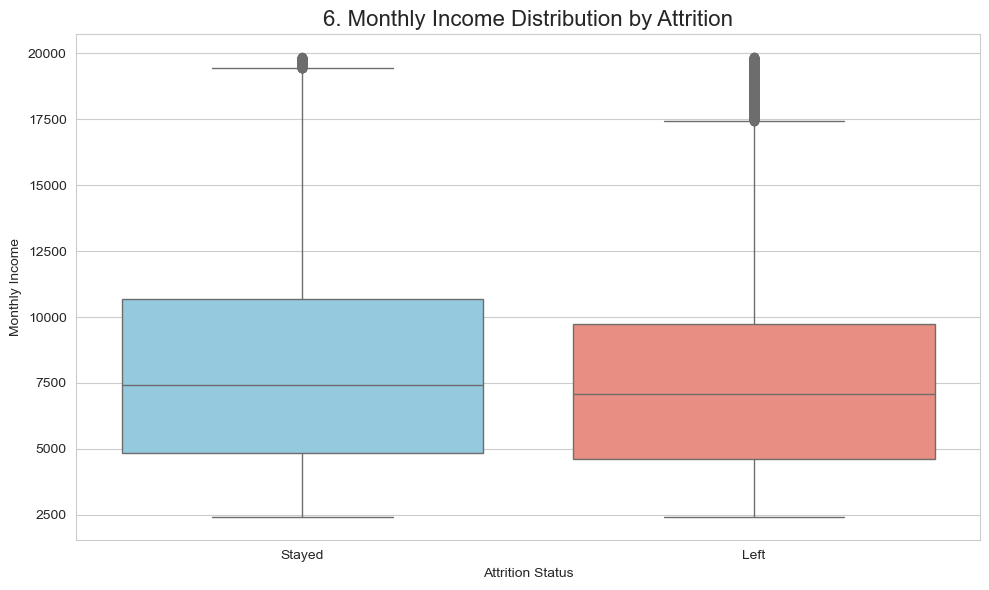

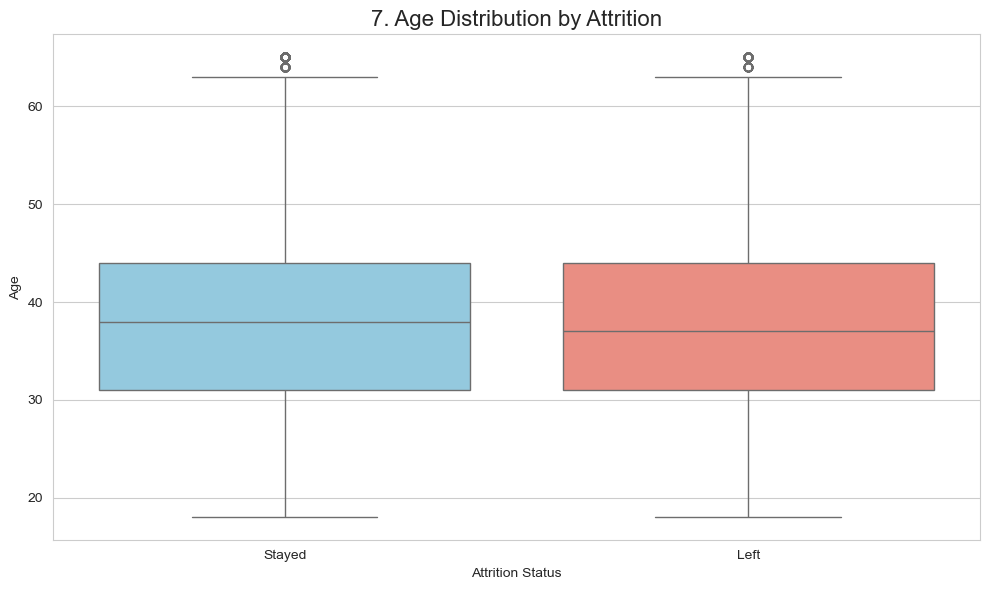

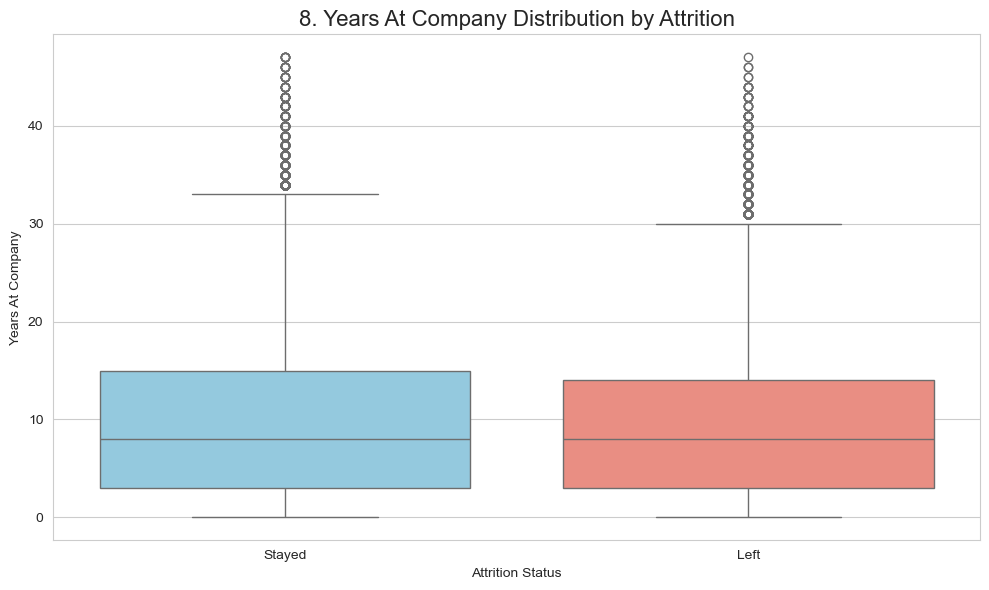

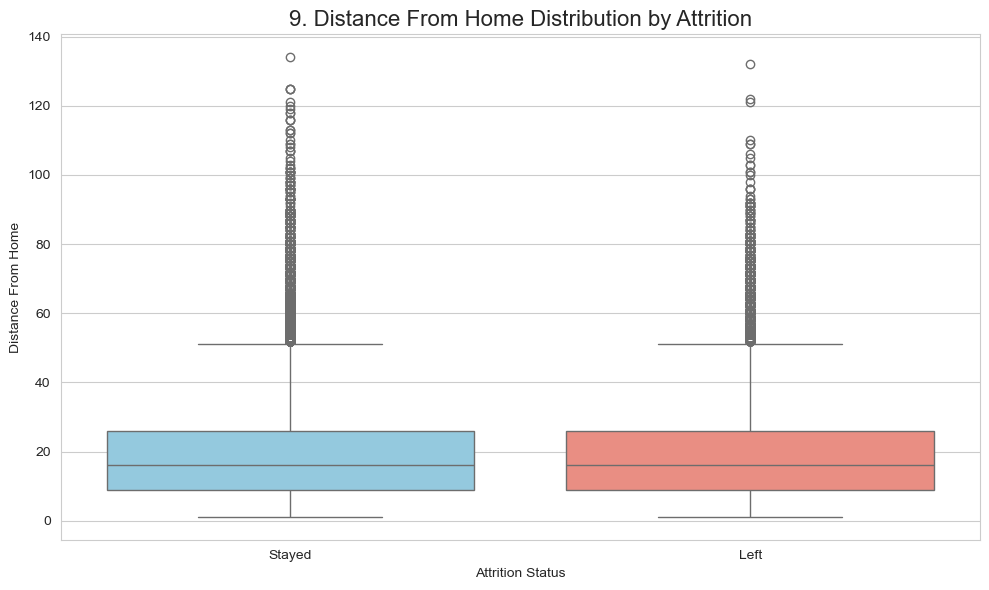

In [175]:
# --- Visualizations 6-9: Numerical Features (Box Plots) ---
numerical_features = ['monthly_income', 'age', 'years_at_company', 'distance_from_home']
for i, feature in enumerate(numerical_features, 6):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='attrition', y=feature, palette=palette_colors)
    plt.title(f'{i}. {feature.replace("_", " ").title()} Distribution by Attrition', fontsize=16)
    plt.xlabel('Attrition Status')
    plt.ylabel(feature.replace("_", " ").title())
    plt.tight_layout()
    plt.show()    

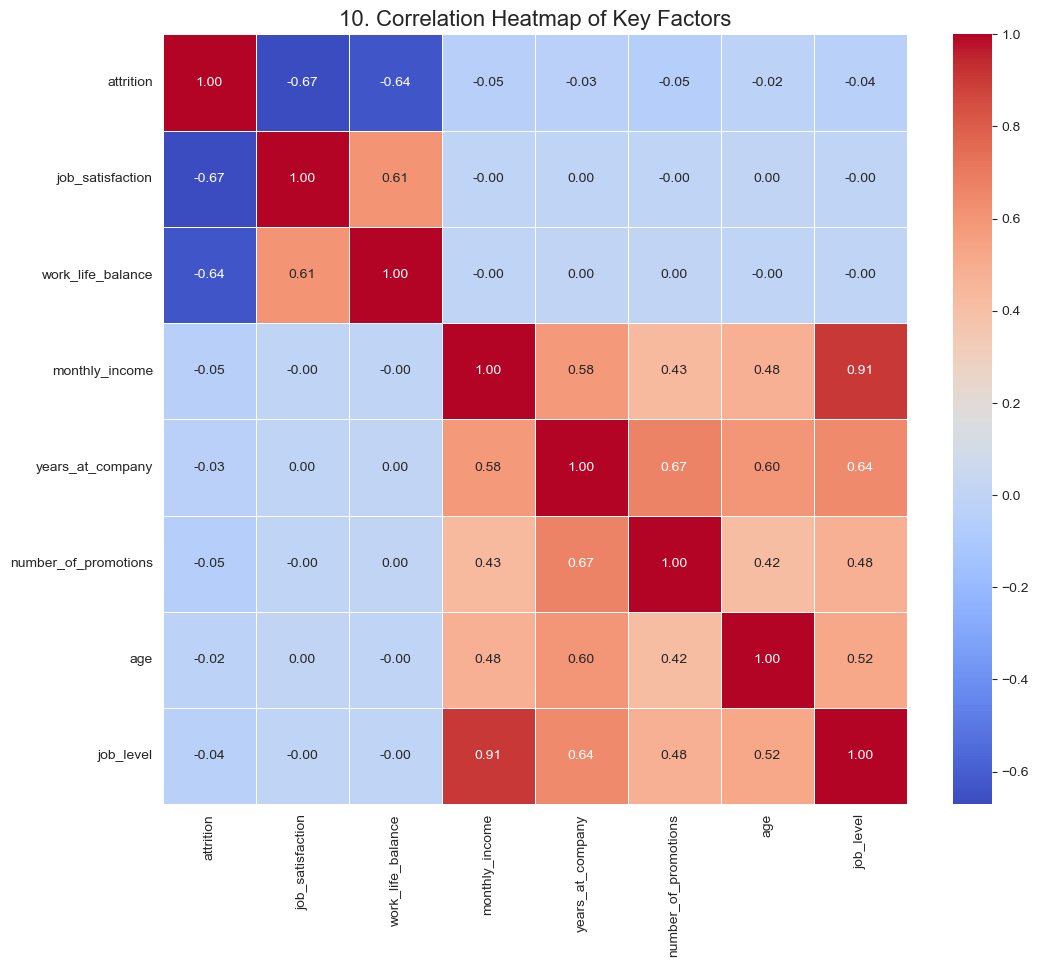

In [176]:
# --- Visualization 10: Correlation Heatmap ---
df_corr = df.copy()
df_corr['attrition'] = df_corr['attrition'].map({'Stayed': 0, 'Left': 1})
mappings = {
    'work_life_balance': {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3},
    'job_satisfaction': {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3},
    'job_level': {'Entry': 0, 'Mid': 1, 'Senior': 2},
    'employee_recognition': {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
}
for col, mapping in mappings.items():
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].map(mapping)

# We select only the most relevant columns for a cleaner heatmap
relevant_cols = ['attrition', 'job_satisfaction', 'work_life_balance', 'monthly_income', 
                 'years_at_company', 'number_of_promotions', 'age', 'job_level']
correlation_matrix = df_corr[relevant_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('10. Correlation Heatmap of Key Factors', fontsize=16)
plt.show()

In [180]:
df_scaled.to_csv("../../data/Faker_Data/scaled_data.csv", index=False)